## Import dependencies and data file

In [30]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib as mpl

#import warnings
#warnings.filterwarnings('ignore')

In [2]:
OSMI_MHIT_cleaned = pd.read_csv(Path('../resources/OSMI_MHIT_mostly_clean.csv'))
OSMI_MHIT_cleaned

,new_id,self_employed,company_size,tech_company,mh_coverage,mh_coverage_awareness,mh_employer_discussion,mh_resources_provided,mh_anonimity,mh_medical_leave,...,age,gender,country_live,live_us_state,country_work,work_us_state,work_position,remote,quantile_age_1,quantile_age_2
0,1,0,26-100,1,Not eligible for coverage / N/A,I am not sure,No,No,I don't know,Very easy,...,39,male,United Kingdom,none,United Kingdom,none,Back-end Developer,Sometimes,"(38.0, 99.0]","(37.0, 39.0]"
1,2,0,6-25,1,No,Yes,Yes,Yes,Yes,Somewhat easy,...,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never,"(28.0, 32.0]","(27.0, 29.0]"
2,3,0,6-25,1,No,I am not sure,No,No,I don't know,Neither easy nor difficult,...,38,male,United Kingdom,none,United Kingdom,none,Back-end Developer,Always,"(32.0, 38.0]","(37.0, 39.0]"
3,4,0,6-25,0,Yes,Yes,No,No,No,Neither easy nor difficult,...,43,female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes,"(38.0, 99.0]","(39.0, 44.0]"
4,5,0,More than 1000,1,Yes,I am not sure,No,Yes,Yes,Somewhat easy,...,42,male,United Kingdom,none,United Kingdom,none,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes,"(38.0, 99.0]","(39.0, 44.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,1003,0,100-500,1,I don't know,I am not sure,No,I don't know,I don't know,Somewhat easy,...,26,female,Canada,none,Canada,none,Other,Sometimes,"(19.999, 28.0]","(25.0, 27.0]"
1000,1004,0,500-1000,1,Yes,No,No,No,Yes,Somewhat easy,...,38,female,United States of America,Illinois,United States of America,Illinois,Support,Always,"(32.0, 38.0]","(37.0, 39.0]"
1001,1005,0,100-500,1,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,52,male,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes,"(38.0, 99.0]","(44.0, 99.0]"
1002,1006,0,100-500,0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,...,30,female,United States of America,Nebraska,United States of America,Nebraska,DevOps/SysAdmin,Sometimes,"(28.0, 32.0]","(29.0, 30.0]"


## inspect dataset

In [3]:
OSMI_MHIT_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 54 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   new_id                                 1004 non-null   int64 
 1   self_employed                          1004 non-null   int64 
 2   company_size                           1004 non-null   object
 3   tech_company                           1004 non-null   int64 
 4   mh_coverage                            1004 non-null   object
 5   mh_coverage_awareness                  1004 non-null   object
 6   mh_employer_discussion                 1004 non-null   object
 7   mh_resources_provided                  1004 non-null   object
 8   mh_anonimity                           1004 non-null   object
 9   mh_medical_leave                       1004 non-null   object
 10  mh_discussion_negative_impact          1004 non-null   object
 11  ph_discussion_neg

In [4]:
# inspect values for 'mh_for_others_bad_response_workplace'
OSMI_MHIT_cleaned['mh_for_others_bad_response_workplace'].value_counts()

No       176
Yes      168
Maybe    113
Name: mh_for_others_bad_response_workplace, dtype: int64

In [5]:
OSMI_MHIT_cleaned['mh_for_others_bad_response_workplace'].describe()

count     457
unique      3
top        No
freq      176
Name: mh_for_others_bad_response_workplace, dtype: object

In [6]:
# inspect values for 'yes_what_dx?'
OSMI_MHIT_cleaned['yes_what_dx?'].value_counts()

Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)                                                                           91
Mood Disorder (Depression, Bipolar Disorder, etc)                                                                                                                               76
Anxiety Disorder (Generalized, Social, Phobia, etc)                                                                                                                             34
Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder                                                                                      21
Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder                                  18
                                                                                                         

In [7]:
# inspect values for 'yes_condition_dx'
OSMI_MHIT_cleaned['yes_condition_dx'].value_counts()

Mood Disorder (Depression, Bipolar Disorder, etc)                                                                                                                                                   140
Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)                                                                                               116
Anxiety Disorder (Generalized, Social, Phobia, etc)                                                                                                                                                  50
Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder                                                                                                           27
Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder                                                       22


In [8]:
# fill null values in above three columns with 'no answer'
# fill null values in 'mh_for_others_bad_response_workplace' with 'none'
OSMI_MHIT_cleaned['mh_for_others_bad_response_workplace'].fillna('no answer', inplace = True)

# fill null values in 'yes_what_dx?' with 'none'
OSMI_MHIT_cleaned['yes_what_dx?'].fillna('no answer', inplace = True)

# fill null values in 'yes_condition_dx' with 'none'
OSMI_MHIT_cleaned['yes_condition_dx'].fillna('no answer', inplace = True)

## create arrays and variables

In [9]:
OSMI_MHIT_cleaned['country_live'].value_counts()

United States of America    707
United Kingdom              134
Canada                       62
Germany                      44
Netherlands                  31
Australia                    26
Name: country_live, dtype: int64

In [10]:
OSMI_MHIT_cleaned['country_work'].value_counts()

United States of America    709
United Kingdom              133
Canada                       60
Germany                      44
Netherlands                  31
Australia                    26
United Arab Emirates          1
Name: country_work, dtype: int64

In [13]:
# submissions for US-working and US-living reporters
live_work_in_USA = OSMI_MHIT_cleaned.loc[(OSMI_MHIT_cleaned['country_live']=='United States of America') & (OSMI_MHIT_cleaned['country_work']=='United States of America')]
live_work_in_USA

,new_id,self_employed,company_size,tech_company,mh_coverage,mh_coverage_awareness,mh_employer_discussion,mh_resources_provided,mh_anonimity,mh_medical_leave,...,age,gender,country_live,live_us_state,country_work,work_us_state,work_position,remote,quantile_age_1,quantile_age_2
1,2,0,6-25,1,No,Yes,Yes,Yes,Yes,Somewhat easy,...,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never,"(28.0, 32.0]","(27.0, 29.0]"
3,4,0,6-25,0,Yes,Yes,No,No,No,Neither easy nor difficult,...,43,female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes,"(38.0, 99.0]","(39.0, 44.0]"
5,6,0,26-100,1,I don't know,No,No,No,I don't know,Somewhat easy,...,30,male,United States of America,Tennessee,United States of America,Tennessee,Back-end Developer,Sometimes,"(28.0, 32.0]","(29.0, 30.0]"
6,7,0,More than 1000,1,Yes,Yes,No,Yes,Yes,Very easy,...,37,female,United States of America,Virginia,United States of America,Virginia,Dev Evangelist/Advocate|Back-end Developer,Always,"(32.0, 38.0]","(34.0, 37.0]"
7,8,0,26-100,0,I don't know,No,No,No,I don't know,Very difficult,...,44,female,United States of America,California,United States of America,California,Support|Back-end Developer|One-person shop,Sometimes,"(38.0, 99.0]","(39.0, 44.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,995,0,500-1000,1,No,No,No,No,I don't know,Somewhat easy,...,24,male,United States of America,Arizona,United States of America,Arizona,Front-end Developer,Never,"(19.999, 28.0]","(19.0, 25.0]"
994,998,0,More than 1000,1,Yes,Yes,Yes,Yes,Yes,Somewhat easy,...,41,male,United States of America,Alabama,United States of America,Alabama,Supervisor/Team Lead|Back-end Developer|Designer,Sometimes,"(38.0, 99.0]","(39.0, 44.0]"
1000,1004,0,500-1000,1,Yes,No,No,No,Yes,Somewhat easy,...,38,female,United States of America,Illinois,United States of America,Illinois,Support,Always,"(32.0, 38.0]","(37.0, 39.0]"
1001,1005,0,100-500,1,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,52,male,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes,"(38.0, 99.0]","(44.0, 99.0]"


In [16]:
# submissions for non-US-working and non-US-living reporters
live_work_not_in_USA = OSMI_MHIT_cleaned.loc[(OSMI_MHIT_cleaned['country_live']!='United States of America') & (OSMI_MHIT_cleaned['country_work']!='United States of America')]
live_work_not_in_USA

,new_id,self_employed,company_size,tech_company,mh_coverage,mh_coverage_awareness,mh_employer_discussion,mh_resources_provided,mh_anonimity,mh_medical_leave,...,age,gender,country_live,live_us_state,country_work,work_us_state,work_position,remote,quantile_age_1,quantile_age_2
0,1,0,26-100,1,Not eligible for coverage / N/A,I am not sure,No,No,I don't know,Very easy,...,39,male,United Kingdom,none,United Kingdom,none,Back-end Developer,Sometimes,"(38.0, 99.0]","(37.0, 39.0]"
2,3,0,6-25,1,No,I am not sure,No,No,I don't know,Neither easy nor difficult,...,38,male,United Kingdom,none,United Kingdom,none,Back-end Developer,Always,"(32.0, 38.0]","(37.0, 39.0]"
4,5,0,More than 1000,1,Yes,I am not sure,No,Yes,Yes,Somewhat easy,...,42,male,United Kingdom,none,United Kingdom,none,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes,"(38.0, 99.0]","(39.0, 44.0]"
11,12,0,100-500,0,Yes,Yes,Yes,Yes,Yes,Somewhat easy,...,44,male,Canada,none,Canada,none,DevOps/SysAdmin|Back-end Developer|Front-end D...,Sometimes,"(38.0, 99.0]","(39.0, 44.0]"
14,15,0,26-100,1,Not eligible for coverage / N/A,No,No,No,I don't know,Very difficult,...,32,female,Canada,none,Canada,none,Front-end Developer,Always,"(28.0, 32.0]","(30.0, 32.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1000,0,100-500,1,Yes,I am not sure,Yes,I don't know,I don't know,Somewhat easy,...,24,male,Canada,none,Canada,none,Back-end Developer,Sometimes,"(19.999, 28.0]","(19.0, 25.0]"
997,1001,0,100-500,1,Not eligible for coverage / N/A,I am not sure,No,No,I don't know,Somewhat difficult,...,22,female,Canada,none,Canada,none,Back-end Developer|Front-end Developer,Sometimes,"(19.999, 28.0]","(19.0, 25.0]"
998,1002,0,100-500,1,Yes,I am not sure,Yes,Yes,Yes,Somewhat easy,...,24,male,Canada,none,Canada,none,Supervisor/Team Lead|Front-end Developer|Back-...,Sometimes,"(19.999, 28.0]","(19.0, 25.0]"
999,1003,0,100-500,1,I don't know,I am not sure,No,I don't know,I don't know,Somewhat easy,...,26,female,Canada,none,Canada,none,Other,Sometimes,"(19.999, 28.0]","(25.0, 27.0]"


In [24]:
# Calculate the percentage of mh_coverage responses for each USA live-work
mh_coverage_in_USA_percents = 100 * live_work_in_USA.groupby(['mh_coverage']).count()['new_id']/live_work_in_USA['new_id'].count()
round(mh_coverage_in_USA_percents,2)

mh_coverage
I don't know                       27.62
No                                  9.49
Not eligible for coverage / N/A     2.69
Yes                                60.20
Name: new_id, dtype: float64

In [25]:
# Calculate the percentage of mh_coverage responses for each non-USA live-work
mh_coverage_not_in_USA_percents = 100 * live_work_not_in_USA.groupby(['mh_coverage']).count()['new_id']/live_work_not_in_USA['new_id'].count()
round(mh_coverage_not_in_USA_percents,2)


mh_coverage
I don't know                       26.87
No                                 29.25
Not eligible for coverage / N/A    15.31
Yes                                28.57
Name: new_id, dtype: float64

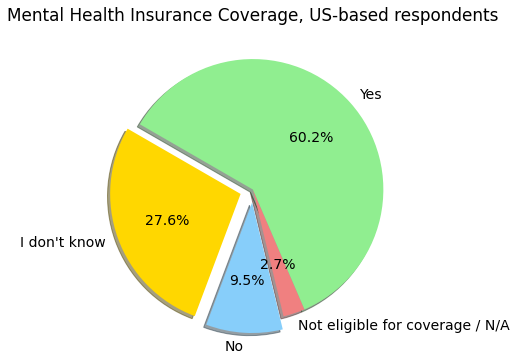

In [36]:
# Build percentage of MH Insur. coverage by city nationality.
# Coverage in USA
plt.subplots(figsize=(10, 6))
plt.pie(mh_coverage_in_USA_percents,
        labels=["I don't know", "No", "Not eligible for coverage / N/A", "Yes"],
        colors=["gold", "lightskyblue", "lightcoral", "lightgreen"],
        explode=[0.1, 0.1, 0,0],
        autopct='%1.1f%%',
        shadow=True,
        startangle=150)
plt.title("Mental Health Insurance Coverage, US-based respondents")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("../images/mh_covg_USA.png")

# Show Figure
plt.show()

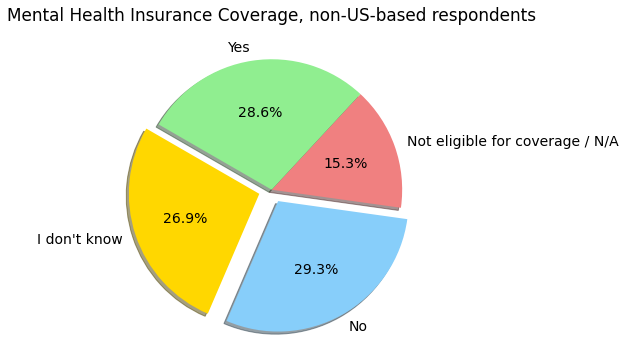

In [37]:
# Build percentage of MH Insur. coverage by city nationality.
# Coverage outside of USA
plt.subplots(figsize=(10, 6))
plt.pie(mh_coverage_not_in_USA_percents,
        labels=["I don't know", "No", "Not eligible for coverage / N/A", "Yes"],
        colors=["gold", "lightskyblue", "lightcoral", "lightgreen"],
        explode=[0.1, 0.1, 0,0],
        autopct='%1.1f%%',
        shadow=True,
        startangle=150)
plt.title("Mental Health Insurance Coverage, non-US-based respondents")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("../images/mh_covg_not_USA.png")

# Show Figure
plt.show()

In [20]:
live_work_in_USA['mh_coverage'].value_counts(dropna=False)

Yes                                425
I don't know                       195
No                                  67
Not eligible for coverage / N/A     19
Name: mh_coverage, dtype: int64

In [21]:
live_work_not_in_USA['mh_coverage'].value_counts(dropna=False)

No                                 86
Yes                                84
I don't know                       79
Not eligible for coverage / N/A    45
Name: mh_coverage, dtype: int64

In [ ]:
# mental health coverage outside US 